In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("2016-2019-voter-data.csv")

In [19]:
df.head()

,Region,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,...,2019-Clustered_Precincts,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout
0,ARMM,BASILAN,AKBAR,5349.0,2560.0,2789.0,137.0,1411.0,674.0,613.0,...,11,6183,2943,3240,4303,1942,2361,69.59,65.99,72.87
1,ARMM,BASILAN,AL-BARKA,7332.0,3371.0,3961.0,46.0,1903.0,1029.0,936.0,...,16,9074,4284,4790,6782,3110,3672,74.74,72.60,76.66
2,ARMM,BASILAN,HADJI MOHAMMAD AJUL,8594.0,4299.0,4295.0,1232.0,1716.0,1162.0,908.0,...,16,11193,5664,5529,6906,3535,3371,61.70,62.41,60.97
3,ARMM,BASILAN,HADJI MUHTAMAD,8135.0,4326.0,3809.0,211.0,1809.0,1227.0,1095.0,...,15,9373,4968,4405,6428,3401,3027,68.58,68.46,68.72
4,ARMM,BASILAN,LAMITAN CITY,45827.0,22505.0,23322.0,5623.0,7227.0,5375.0,4767.0,...,73,51623,25447,26176,37589,18835,18754,72.81,74.02,71.65


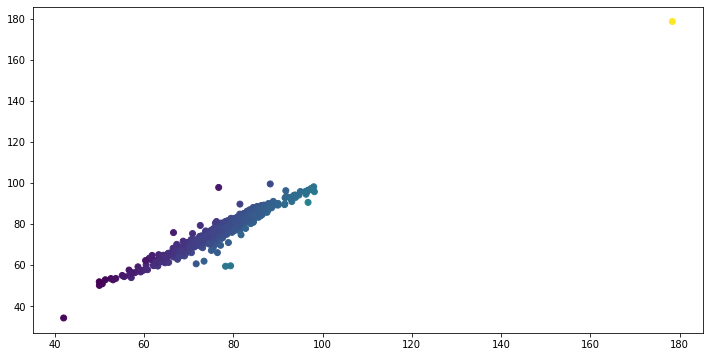

In [27]:
# lets first look at the distribution of the data

# these are the features we'll be using
feature_cols = ['2019-Total_Voters_Turnout','2019-Male_Voters_Turnout','2019-Female_Voters_Turnout']

plt.figure(figsize=(12,6))
plt.scatter(df.loc[:, '2019-Total_Voters_Turnout'], df.loc[:, '2019-Male_Voters_Turnout'], c=df.loc[:,'2019-Female_Voters_Turnout'])


As you can see there are no distinct groups in the data, which means the variables used may not be good indicators for clustering, but for this example we will still use it

## The next step is to always normalize your data
The reason why we need to do this is because KMeans algorithm clusters each data point in terms of distance, so the difference in magnitude wont affect the performance of the model

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# select the features we're using
feature_cols = ['2019-Total_Voters_Turnout','2019-Male_Voters_Turnout','2019-Female_Voters_Turnout']
X = df[feature_cols]

# feature scaling
X = scaler.fit_transform(X.values)

## Now that we've normalized our data, we can proceed to making our model

In [34]:
# first lets initialize a random number for K, and let's use K-means++ as in order to optimize the our centroids

from sklearn.cluster import KMeans
# defining the number of K
kmeans = KMeans(n_clusters=5, init='k-means++')
# fitting the model to our scaled data
kmeans.fit(X)
y_pred = kmeans.predict(X) # these are our labels

In [36]:
# now lets evaluate how good our model did by looking at the inertia and silhouette score
from sklearn.metrics import silhouette_score

s_score = silhouette_score(X, y_pred)

print("Inertia: " + str(kmeans.inertia_))
print("Silhouette: " + str(s_score))

Inertia: 910.7618141960709
Silhouette: 0.4356994820911885


Based on these values, our model did not do good. 
For inertia, we want it to be as low as possible, and for silhouette, you want it to be closer to 1 than -1

## Let's try to tune our model to get better results

In [48]:
inertia = []
sil = []

# fitting the model through different number of clusters to see which does better
for k in range(3,20):
    km = KMeans(n_clusters=k, random_state=1, init='k-means++')
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

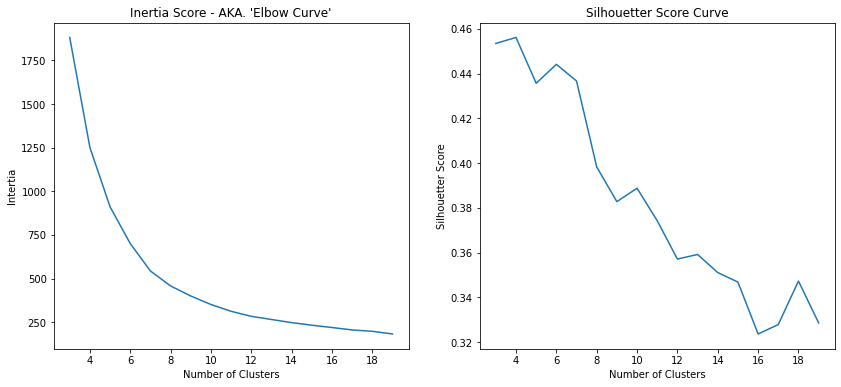

In [49]:
# now lets plot the results

fig, ax = plt.subplots(1,2, figsize=(14,6))

# plotting the elbow curve
x_iner = [x[0] for x in inertia]
y_iner = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# plotting the silhouette score
x_sil = [x[0] for x in sil]
y_sil = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

Its a bit hard to see the most optimal number of K here, but let's go with 7

## Apply the number of clusters you chose from the graph

In [51]:
kmeans = KMeans(n_clusters=7, init='k-means++')
kmeans.fit(X)
labels = kmeans.predict(X)